# EHR sequences visualization

In [86]:
import os
import csv
import json
import pandas as pd 
import re

In [1]:
DATA_PATH = os.path.expanduser('~/data1/multMyeloma/data')

##Prepare the batches with data from the vocabulary of rxnorm terms
##read the file csv with the rxnorm data and create the vocabulary
patient_dict = {}
rxnorm_codes = []
with open(os.path.join(DATA_PATH, 'normalized_MMehr.csv'), newline='') as csvfile:
    rows = csv.reader(csvfile, delimiter=',', quotechar='"')
    for el in rows:
        rxnorm_codes.append(el[1])
        if el[0] in patient_dict:
            patient_dict[el[0]].append(el[1])
        else:
            patient_dict[el[0]] = [el[1]]

def create_dict(listOfMedTerms): 
    mt_to_ix = {}
    ix_to_mt = {}
    
    for term in listOfMedTerms:
        if term not in mt_to_ix:
            mt_to_ix[term] = len(mt_to_ix)
            ix_to_mt[len(ix_to_mt)] = term
    return mt_to_ix, ix_to_mt

rxnorm_to_ix, ix_to_rxnorm = create_dict(rxnorm_codes)

##select the sequences with length greater equal than 100
##create patient sequences of different lengths
patient_sequences = []
for _, sentence in patient_dict.items():
    if len(sentence) >= 1:
        patient_sequences += [[rxnorm_to_ix[rxnorm_term] for rxnorm_term in sentence]]
        
with open(os.path.join(DATA_PATH, 'patient_sequences.json'), 'w') as f:
    json.dump(patient_sequences, f)

In [45]:
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
lengths = []
for seq in patient_sequences:
    lengths.append(len(seq))

(array([1.316e+03, 3.980e+02, 2.180e+02, 1.210e+02, 1.010e+02, 9.300e+01,
        1.330e+02, 1.420e+02, 1.060e+02, 8.200e+01, 7.700e+01, 7.100e+01,
        6.800e+01, 5.700e+01, 5.800e+01, 5.100e+01, 4.100e+01, 2.900e+01,
        3.200e+01, 2.800e+01, 3.000e+01, 3.000e+01, 2.700e+01, 2.400e+01,
        2.200e+01, 1.200e+01, 1.700e+01, 2.500e+01, 1.600e+01, 1.300e+01,
        1.500e+01, 1.100e+01, 8.000e+00, 9.000e+00, 1.300e+01, 1.100e+01,
        1.000e+01, 5.000e+00, 1.400e+01, 7.000e+00, 2.000e+00, 6.000e+00,
        5.000e+00, 9.000e+00, 9.000e+00, 8.000e+00, 0.000e+00, 6.000e+00,
        5.000e+00, 2.000e+00, 2.000e+00, 4.000e+00, 3.000e+00, 4.000e+00,
        2.000e+00, 1.000e+00, 4.000e+00, 1.000e+00, 2.000e+00, 2.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        3.000e+00, 3.000e+00, 2.000e+00, 1.000e+00, 2.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+0

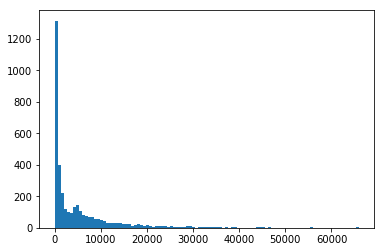

In [9]:
##visualize the sequence lengths distribution
plt.hist(lengths, bins=100)

In [78]:
DATA_PATH = os.path.expanduser("~/data1/multMyeloma/data/")
EHR_FILENAME = "MMehr_data.csv"
ICDMAP_FILENAME = "icd10cmtoicd9gem.csv"

In [14]:
MMehr_data = pd.read_csv(os.path.join(DATA_PATH, EHR_FILENAME),
                         sep=",",
                         header=0,
                         index_col=False)

In [40]:
y_num = MMehr_data["YEAR"].value_counts()

In [43]:
year_count = y_num.to_dict()

In [44]:
year_count

{1961: 2,
 1970: 1,
 1971: 1,
 1972: 1,
 1975: 1,
 1976: 1,
 1977: 1,
 1980: 2,
 1981: 3,
 1982: 4,
 1983: 1,
 1984: 1,
 1986: 1,
 1988: 1,
 1989: 5,
 1990: 2,
 1991: 3,
 1992: 3,
 1993: 2,
 1994: 1,
 1995: 10,
 1996: 5,
 1997: 10,
 1998: 7,
 1999: 7,
 2000: 699,
 2001: 3970,
 2002: 6893,
 2003: 436643,
 2004: 446259,
 2005: 688183,
 2006: 635236,
 2007: 740865,
 2008: 844296,
 2009: 978500,
 2010: 1979322,
 2011: 3116869,
 2012: 3464375,
 2013: 4058059,
 2014: 4983015,
 2015: 967191,
 2016: 7132,
 2019: 2,
 2026: 1,
 2031: 2,
 2041: 1,
 2501: 14}

In [72]:
idx = (MMehr_data["YEAR"] <= 1980)

In [73]:
MMehr_rid = MMehr_data[-idx]

In [74]:
idx2 = MMehr_rid["YEAR"] > 2016

In [76]:
MMehr_rid = MMehr_rid[-idx2]

In [79]:
##Import ehr data of MM patients and conversion table from icd10 to icd
icd10TOicd9 = pd.read_csv(os.path.join(DATA_PATH, ICDMAP_FILENAME),
                         sep=",",
                         header=0,
                         index_col=False)

In [80]:
##create a dictionary {'icd10_code':'icd9_code'}
icd10icd9_dict = {}

for i, diag in enumerate(icd10TOicd9["icd10"]):
    icd10icd9_dict[diag] = icd10TOicd9["icd9"][i]

In [82]:
##map icd10 to icd9 when available
code_list = MMehr_rid["CODE"].tolist()
label_list = MMehr_rid["CODE_LABEL"].tolist()

for i, med in enumerate(code_list):
    if label_list[i] == "icd10":
        tmp = "".join(str.split(med, "."))
        if tmp in icd10icd9_dict:
            trad = icd10icd9_dict[tmp]
            if len(list(trad)) >= 4:
                code_list[i] = ''.join(list(trad)[0:3]) + '.' + ''.join(list(trad[3:len(trad)]))
            else:
                code_list[i] = trad
            label_list[i] = 'icd9'

In [97]:
##add LABEL:CODE column and the modified columns with CODE and CODE_LABEL
MMehr_rid["LABEL:CODE"] = pd.Series([label_list[i] + ':' + code_list[i] for i in range(len(code_list))], dtype=str)
MMehr_rid["CODE"] = pd.Series(code_list)
MMehr_rid["CODE_LABEL"] = pd.Series(label_list)

In [98]:
idx = MMehr_rid["CODE_LABEL"] == 'icd10' ##eliminated those records in which the diagnosis could not be mapped to icd9
MMehr_rid = MMehr_rid[-idx]

In [99]:
##read annotation files and create a dictionary of dictionaries (e.g. {'cpt':{'code':[CUI, ONTOLOGY_ID, LABEL], ...}, ...}
ann_l = {}
for _, _, files in os.walk(DATA_PATH):
    for f in files:
        if re.match('annotation', f):
            with open(os.path.join(DATA_PATH, f), newline='') as csvfile:
                rows = csv.reader(csvfile, delimiter=',', quotechar='"')
                d = {}
                for row in rows:
                    d[row[0]] = row[1:len(row)]
                ann_l[f.split('-')[1].split('.')[0]] = d

In [101]:
#map the codes to the normalized labels and add a new column to the dataframe
rxnorm = []
for lab_code in MMehr_rid["LABEL:CODE"]:
    el = lab_code.split(":")
    if el[1] in ann_l[el[0]]:
        rxnorm += [ann_l[el[0]][el[1]][-1]]
    else:
        rxnorm += ['NA']
        

MMehr_tmp["RXNORM"] = rxnorm

AttributeError: 'float' object has no attribute 'split'

In [111]:
##eliminate NA labels
idna = MMehr_rid["RXNORM"] == 'NA'
MMehr_rid = MMehr_rid[-idna]

##54061535 records eliminated

In [112]:
mrn_list = MMehr_tmp["MEDICAL_RECORD_NUMBER"].tolist()
rxnorm_list = MMehr_tmp["RXNORM"].tolist()

In [114]:
#Write everything to a csv file with only MEDICAL_RECORD_NUMBER | RXNORM LABEL
with open(os.path.join(DATA_PATH, 'normalized_MMehrTmp.csv'), 'w', newline='') as csvfile:
    normalizedData = csv.writer(csvfile, delimiter=',', quotechar='"')
    for i in range(len(rxnorm_list)):
        normalizedData.writerow([mrn_list[i], rxnorm_list[i]])


In [1]:
import torch
import torch.nn as nn

In [2]:
ohemb = torch.LongTensor([[0,0,1], [0,1,0], [1,0,0]])

emb = nn.Embedding(num_embeddings=3,embedding_dim=5, padding_idx=0)

out = emb(ohemb)

In [3]:
out

tensor([[[ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
         [-0.1823, -2.5362,  0.0447, -0.7248, -1.5738]],

        [[ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
         [-0.1823, -2.5362,  0.0447, -0.7248, -1.5738],
         [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000]],

        [[-0.1823, -2.5362,  0.0447, -0.7248, -1.5738],
         [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000]]])

In [4]:
loss = nn.CrossEntropyLoss()
input = torch.randn(3, 5, requires_grad=True)
target = torch.empty(3, dtype=torch.long).random_(5)
output = loss(input, target)
output.backward()

In [5]:
output

tensor(0.9358)

In [6]:
input

tensor([[-0.2239,  2.0010, -1.5064,  0.1219,  0.7577],
        [ 0.6385, -0.4083,  1.3763, -1.2596, -0.6130],
        [-1.3997,  0.9666, -1.8931, -0.5839,  1.7356]])

In [7]:
target

tensor([ 4,  2,  4])